### Machine Learning with Iris Flower ###
*Created in ML studies at Le Mans University*

In this notebook, we see some supervised classification models (K-NN, SVM, Decision Tree, Logistic Regression) using sklearn (scikit-learn).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Importing numpy and pandas for scientific computing
# Importing seaborn and matplot.pyplot for plotting data

###### 0 : Opening Data

In [3]:
# Reading the csv file with pandas
iris_ds = pd.read_csv('Iris.csv')

In [4]:
# The .head() allow to see the first 5 éléments of the dataset.
# We can see that, there is 5 column defining iris flowers.
iris_ds.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# The .info() allow to see file infos and to check if there is any inconsistency in the dataset
iris_ds.info()

# Drop the unused Id column. 
iris_ds.drop('Id',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


### 1 : Data analysis

###### 1.1 - Relation between Length and Width of Petal and Sepal

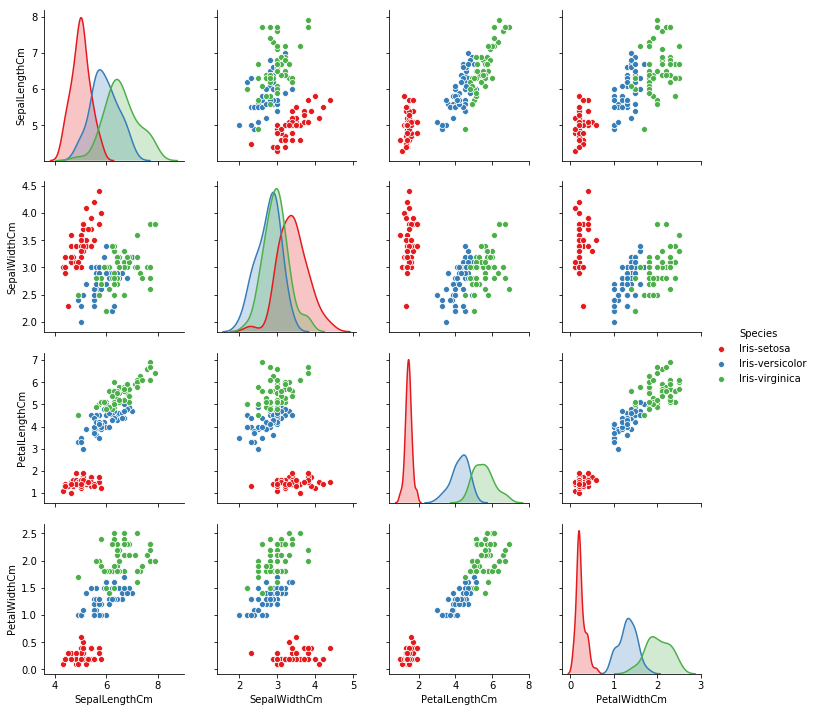

In [20]:
# This graph shows the relation between each features
sns.pairplot(data=iris_ds,hue="Species",palette="Set1")
plt.show()

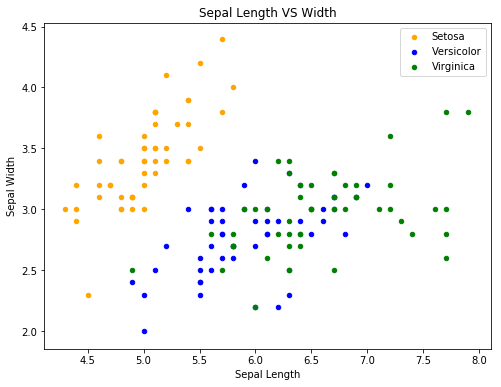

In [7]:
# PLotting list of elements using SepalLengthCm and SepalWidthCm (indexes of the csv file)
fig = iris_ds[iris_ds.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris_ds[iris_ds.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Versicolor',ax=fig)
iris_ds[iris_ds.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='Virginica', ax=fig)

# Setting the label of x and y axis
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")

# Setting the graph's title
fig.set_title("Sepal Length VS Width")
# plt.gcf() allow to get a reference of the current figure.
fig=plt.gcf()
# setting the frame size of the figure
fig.set_size_inches(8,6)


plt.show()

The graph above shows relationship between Sepal Width and Sepal Length separated by species.

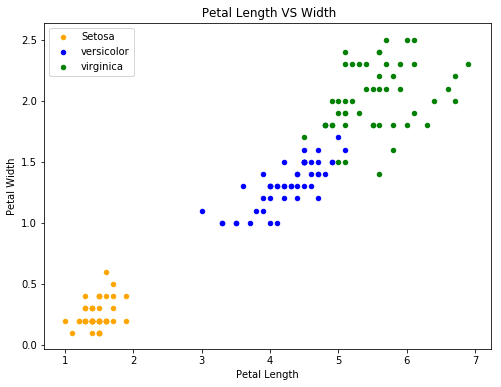

In [8]:
fig = iris_ds[iris_ds.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris_ds[iris_ds.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris_ds[iris_ds.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)

fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")

fig=plt.gcf()
fig.set_size_inches(8,6)

plt.show()

According to the data comparison (Petal and Sepal), the Petal features give a distinct clustering. So this feature seems to be more indicative for an prediction work. 

##### 1.2 - Features distribution

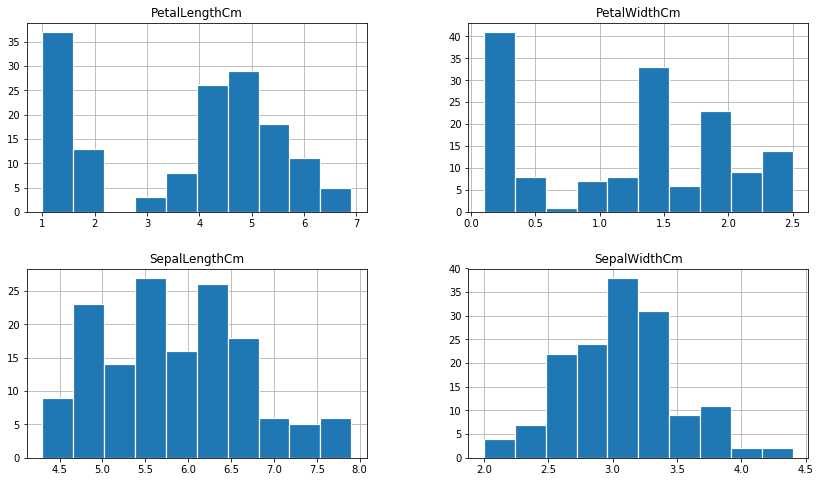

In [33]:
fig2 = iris_ds.hist(edgecolor='white', linewidth=1.2)
fig2 = plt.gcf()
plt.rc('axes',axisbelow=True) # This is used to put the grid under all figure (background)
fig2.set_size_inches(14,8)
plt.show()

### 2 : Classification

In [10]:
# Importing packages for classification
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm   
from sklearn.tree import DecisionTreeClassifier 

##### 2.1 - Feature Correlation

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


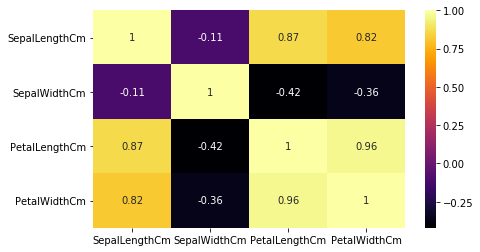

In [11]:
plt.figure(figsize=(7,4))

# The iris_ds.corr() return a correlation matrix between features
print(iris_ds.corr())

# Draws heatmap with input as the correlation matrix
sns.heatmap(iris_ds.corr(),annot=True,cmap='inferno')

plt.show()

According to this heatmap, Sepal Length and Sepal Width are not correlated, however, Petal Lenght and Petal Width are highly correlated.

##### 2.2 - Splitting data

The main dataset is splitted into 2 parts.
The **Training** and **Testing** parts.
Usually, an ordinary separation could be 70-30, it means 70% of data into the Training set and 30% into the Testing Set.

The **Training** set is used to train the model to the classification. The **Testing** set is used to test the model and analyse outputed results. 

In [12]:
train, test = train_test_split(iris_ds, test_size = 0.3 )
print("Original Dataset Shape :", iris_ds.shape)
print("Trainning Set :",train.shape)
print("Testing Set :",test.shape)

Original Dataset Shape : (150, 5)
Trainning Set : (105, 5)
Testing Set : (45, 5)


In [13]:
# We assign the data features to the training set and test set.
# train_y and test_y are the output species of data sets.
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y = test.Species 

### 3 : Models

##### 3.1 - SVM
SVM (Support Vector Machine) is one of the first solution to classification. It's an Linear Classification *(Ideal for very large data set with high dimension, or if you know the decision boundary is not linear)*

In [14]:
modelSVM = svm.SVC(gamma='auto')
# The first step is to train the model with the training set and training output
modelSVM.fit(train_X, train_y)
# Next, put the testing set to the model
predictionSVM = modelSVM.predict(test_X)

# We end with the accuracy score of the model, comparing the predicted data to the test set output
print("SVM Accuracy : ", metrics.accuracy_score(predictionSVM, test_y))

SVM Accuracy :  0.9555555555555556


##### 3.2 - Logistic Regression
A generalized linear model with dependant variable being binary (0-1). Mostly used to predict wheter and event is going to occur based on the dependant variables.

In [15]:
modelLR = LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=200)

modelLR.fit(train_X,train_y)

predictionLR = modelLR.predict(test_X)

print('Logistic Regression Accuracy : ',metrics.accuracy_score(predictionLR,test_y))

Logistic Regression Accuracy :  0.9555555555555556


##### 3.3 - Decision Tree
Require a little data preparation and can handle both numeric and categorized data. Easy to interpret and visualize but susceptible to overfitting

In [26]:
modelDT = DecisionTreeClassifier()

modelDT.fit(train_X,train_y)

predictionDT = modelDT.predict(test_X)

print('Decision Tree Accuracy :',metrics.accuracy_score(predictionDT,test_y))

Decision Tree Accuracy : 0.9555555555555556


##### 3.4 - K-Nearest Neighbours (KNN)
Lazy learning that doesn't require much in training but can be slow in prediction if large data set.

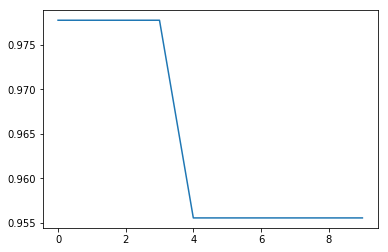

In [32]:
# Changing the value of the n_neighbors affect the result of the accuracy
acc_list = []
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    acc_list.append(metrics.accuracy_score(prediction, test_y))

plt.plot(acc_list)
plt.show()

The evolution of the accuracy_score depends on the number of neighbours. The graph below shows that 3 neighbours maximize the accuracy.

In [27]:
# Here's the K-NN with 3 neighbours
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(train_X, train_y)
predictionKNN = modelKNN.predict(test_X)
print("KNN Accuracy : ", metrics.accuracy_score(predictionKNN, test_y))

KNN Accuracy :  0.9777777777777777
